In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [44]:
df = pd.read_csv('/content/drive/MyDrive/KaggleX_Project/Data/car_accident_preprecced_df.csv')

In [45]:
df.shape

(161260, 41)

In [46]:
pd.set_option('display.max_columns', None) #Show all columns

In [47]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Person ID,Driver At Fault,Injury Severity,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Weekday?,Crash Time,Crash Date,Driver Distracted Group,Year
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,Unknown,Unknown,Unknown,Unknown,OTHER,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,Unknown,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes,NO APPARENT INJURY,Unknown,165AD539-A8C8-4004-AF73-B7DCAAA8B3CC,SUPERFICIAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)",weekday,15:00:00,2019-05-31,Others,2019
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,Unknown,Unknown,Unknown,Unknown,UNKNOWN,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,Unknown,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes,NO APPARENT INJURY,XX,10239493-D667-42F9-A3D2-820FE184CB6C,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,UNKNOWN,39.199047,-77.250743,"(39.19904667, -77.25074333)",weekday,17:00:00,2019-05-24,NOT DISTRACTED,2019
2,MCP2846008X,230034260,Montgomery County Police,Property Damage Crash,County,SELFRIDGE RD,County,RANDOLPH RD,OTHER,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,Unknown,9ACC5A7E-47A1-438F-BF0E-40B0A8632055,Yes,NO APPARENT INJURY,MD,8B61B8E0-5473-4C78-A654-6029684ABD03,SUPERFICIAL,SEVEN OCLOCK,SEVEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,East,East,35,No,No,2003,FORD,TK,NO MISUSE,39.054588,-77.085974,"(39.05458848, -77.08597423)",weekday,10:45:00,2023-07-17,Mental Distractions,2023
3,MCP32610017,230034668,Montgomery County Police,Property Damage Crash,Maryland (State),MUNCASTER MILL RD,County,SHADY GROVE RD,OTHER,UNKNOWN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,Unknown,E611A3F8-5F7D-465B-8DE0-3814027998F1,No,NO APPARENT INJURY,MD,1A592482-AF1F-49CE-8554-77EF7C55966B,SUPERFICIAL,ELEVEN OCLOCK,ELEVEN OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,South,East,45,No,No,2023,TOYT,CP,NO MISUSE,39.148721,-77.147111,"(39.14872076, -77.14711061)",weekday,23:40:00,2023-07-20,NOT DISTRACTED,2023
4,EJ78520081,230033429,Gaithersburg Police Depar,Property Damage Crash,Municipality,PERRY PKWY,Unknown,ENT TO SHOPPING CENTER,SAME DIR REAR END,UNKNOWN,DRY,DAYLIGHT,NO CONTROLS,Unknown,3C7F6951-1701-44DC-9824-88DF4E32352E,Yes,NO APPARENT INJURY,MD,C2EF337E-5881-48ED-9B06-36D0BE00557C,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,"MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4...",MOVING CONSTANT SPEED,Unknown,Unknown,25,No,No,2001,KENWORTH,TRUCK,UNKNOWN,39.149085,-77.210731,"(39.14908542, -77.21073135)",weekday,17:40:00,2023-07-13,External Distractions,2023


# 1. Data preproceccening

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   161260 non-null  object 
 1   Local Case Number               161260 non-null  object 
 2   Agency Name                     161260 non-null  object 
 3   ACRS Report Type                161260 non-null  object 
 4   Route Type                      161260 non-null  object 
 5   Road Name                       161260 non-null  object 
 6   Cross-Street Type               161260 non-null  object 
 7   Cross-Street Name               161260 non-null  object 
 8   Collision Type                  161260 non-null  object 
 9   Weather                         161260 non-null  object 
 10  Surface Condition               161260 non-null  object 
 11  Light                           161260 non-null  object 
 12  Traffic Control 

In [49]:
drop_columns = ['Report Number', 'Cross-Street Name', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Route Type', 'Cross-Street Type', 'Road Name', 'Person ID', 'Drivers License State', 'Vehicle ID', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Continuing Dir', 'Vehicle Going Dir','Driverless Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Location', 'Weekday?', 'Crash Time', 'Crash Date', 'Year', 'Latitude', 'Longitude']

In [50]:
df.drop(columns=drop_columns, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Collision Type           161260 non-null  object
 1   Weather                  161260 non-null  object
 2   Surface Condition        161260 non-null  object
 3   Light                    161260 non-null  object
 4   Traffic Control          161260 non-null  object
 5   Driver Substance Abuse   161260 non-null  object
 6   Driver At Fault          161260 non-null  object
 7   Injury Severity          161260 non-null  object
 8   Vehicle Damage Extent    161260 non-null  object
 9   Vehicle Body Type        161260 non-null  object
 10  Vehicle Movement         161260 non-null  object
 11  Speed Limit              161260 non-null  int64 
 12  Parked Vehicle           161260 non-null  object
 13  Equipment Problems       161260 non-null  object
 14  Driver Distracted Gr

In [52]:
df.to_csv("/content/drive/MyDrive/KaggleX_Project/Data/df_for_ml.csv", index=False)

#### 2. Encoding Categorical Variables

In [53]:
category_columns = ['Collision Type', 'Weather', 'Surface Condition', 'Light',
                   'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Vehicle Damage Extent', 'Vehicle Body Type',
                   'Vehicle Movement', 'Parked Vehicle', 'Equipment Problems',
                    'Driver Distracted Group']

numerical_columns = ['Speed Limit']

In [54]:
label_encoder = LabelEncoder()
for column in category_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [55]:
df.head()

,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Parked Vehicle,Equipment Problems,Driver Distracted Group
0,7,2,8,4,8,6,2,NO APPARENT INJURY,5,18,13,15,0,9,5
1,17,2,8,4,8,6,2,NO APPARENT INJURY,2,18,13,0,0,9,4
2,7,2,0,1,7,6,2,NO APPARENT INJURY,5,18,9,35,0,4,2
3,7,10,0,1,7,6,0,NO APPARENT INJURY,5,18,7,45,0,4,4
4,9,10,0,4,1,6,2,NO APPARENT INJURY,5,12,9,25,0,9,0


In [56]:
target_column = df['Injury Severity'].value_counts()
target_column

NO APPARENT INJURY          131459
POSSIBLE INJURY              16818
SUSPECTED MINOR INJURY       11471
SUSPECTED SERIOUS INJURY      1362
FATAL INJURY                   150
Name: Injury Severity, dtype: int64

In [57]:
severity_mapping = {
    'NO APPARENT INJURY': 0,
    'POSSIBLE INJURY': 1,
    'SUSPECTED MINOR INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4
}

In [58]:
df['Injury Severity'] = df['Injury Severity'].map(severity_mapping)

In [59]:
df['Injury Severity'].value_counts()

0    131459
1     16818
2     11471
3      1362
4       150
Name: Injury Severity, dtype: int64

In [60]:
# Printing the % sub categories of each category
for i in category_columns:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

9     0.334472
16    0.177552
7     0.100192
14    0.096503
15    0.085241
4     0.076727
13    0.022659
3     0.022275
12    0.022095
6     0.017177
1     0.011981
2     0.007156
17    0.006759
10    0.004409
11    0.004390
8     0.004279
0     0.004235
5     0.001898
Name: Collision Type, dtype: float64
****************************************
2     0.677316
6     0.120104
3     0.101067
10    0.081490
9     0.008700
4     0.003845
11    0.002325
5     0.002152
8     0.001302
7     0.000912
1     0.000695
0     0.000093
Name: Weather, dtype: float64
****************************************
0     0.702270
10    0.166588
8     0.116173
1     0.006338
7     0.005711
6     0.001222
4     0.000974
2     0.000285
9     0.000242
3     0.000174
5     0.000025
Name: Surface Condition, dtype: float64
****************************************
4    0.679958
1    0.226063
2    0.028147
5    0.022789
3    0.019776
7    0.012278
0    0.008967
6    0.002022
Name: Light, dtype: float64
***************

In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Collision Type           161260 non-null  int64
 1   Weather                  161260 non-null  int64
 2   Surface Condition        161260 non-null  int64
 3   Light                    161260 non-null  int64
 4   Traffic Control          161260 non-null  int64
 5   Driver Substance Abuse   161260 non-null  int64
 6   Driver At Fault          161260 non-null  int64
 7   Injury Severity          161260 non-null  int64
 8   Vehicle Damage Extent    161260 non-null  int64
 9   Vehicle Body Type        161260 non-null  int64
 10  Vehicle Movement         161260 non-null  int64
 11  Speed Limit              161260 non-null  int64
 12  Parked Vehicle           161260 non-null  int64
 13  Equipment Problems       161260 non-null  int64
 14  Driver Distracted Group  161260 non-

#### 3. Feature Scaling

In [62]:
X = df.drop('Injury Severity', axis=1)
y = df['Injury Severity']

In [63]:
y.value_counts()

0    131459
1     16818
2     11471
3      1362
4       150
Name: Injury Severity, dtype: int64

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [65]:
X

array([[-0.83023473, -0.54023721,  1.28081613, ..., -0.12673057,
         1.59931135,  0.9032229 ],
       [ 1.54465844, -0.54023721,  1.28081613, ..., -0.12673057,
         1.59931135,  0.23874423],
       [-0.83023473, -0.54023721, -0.63664324, ..., -0.12673057,
        -0.62058547, -1.09021312],
       ...,
       [-0.3552561 , -0.1373354 , -0.63664324, ..., -0.12673057,
        -0.62058547,  0.23874423],
       [-2.25517063,  1.07137003,  1.76018097, ..., -0.12673057,
        -0.62058547,  0.23874423],
       [-0.83023473, -0.1373354 ,  1.76018097, ..., -0.12673057,
         1.59931135,  0.23874423]])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
y_test.value_counts()

0    39422
1     5114
2     3407
3      389
4       46
Name: Injury Severity, dtype: int64

## Modeling

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:

# Initialize the classifier
rf = RandomForestClassifier(n_estimators=100)

# Train
rf.fit(X_train, y_train)
# accuracy for train

# Predict
y_pred_rf = rf.predict(X_test)


# Evaluate
print("Metrics report on test data: \n", classification_report(y_test, y_pred_rf))


Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     39422
           1       0.18      0.05      0.08      5114
           2       0.16      0.05      0.08      3407
           3       0.11      0.03      0.05       389
           4       0.44      0.09      0.15        46

    accuracy                           0.79     48378
   macro avg       0.34      0.24      0.25     48378
weighted avg       0.71      0.79      0.74     48378



In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 5,
    'max_depth': 6,
    'eta': 0.3
}

bst = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = bst.predict(dtest)

print("Metrics report on test data: \n",classification_report(y_test, y_pred_xgb))


Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     39422
           1       0.25      0.01      0.02      5114
           2       0.29      0.03      0.05      3407
           3       0.24      0.06      0.10       389
           4       0.29      0.13      0.18        46

    accuracy                           0.81     48378
   macro avg       0.38      0.24      0.25     48378
weighted avg       0.72      0.81      0.74     48378



In [ ]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
3528/3528 [==============================] - 11s 3ms/step - loss: 0.5883 - accuracy: 0.8148 - val_loss: 0.5761 - val_accuracy: 0.8149
Epoch 2/10
3528/3528 [==============================] - 12s 4ms/step - loss: 0.5737 - accuracy: 0.8152 - val_loss: 0.5754 - val_accuracy: 0.8149
Epoch 3/10
3528/3528 [==============================] - 9s 3ms/step - loss: 0.5703 - accuracy: 0.8153 - val_loss: 0.5718 - val_accuracy: 0.8149
Epoch 4/10
3528/3528 [==============================] - 10s 3ms/step - loss: 0.5675 - accuracy: 0.8154 - val_loss: 0.5704 - val_accuracy: 0.8145
Epoch 5/10
3528/3528 [==============================] - 10s 3ms/step - loss: 0.5653 - accuracy: 0.8154 - val_loss: 0.5698 - val_accuracy: 0.8148
Epoch 6/10
3528/3528 [==============================] - 9s 3ms/step - loss: 0.5636 - accuracy: 0.8155 - val_loss: 0.5700 - val_accuracy: 0.8147
Epoch 7/10
3528/3528 [==============================] - 9s 3ms/step - loss: 0.5620 - accuracy: 0.8155 - val_loss: 0.5728 - val_accur

In [ ]:
y_pred_tf = model.predict(X_test)

1512/1512 [==============================] - 3s 2ms/step


In [ ]:
len(y_test)

48378

In [ ]:
len(y_pred_tf)

48378

In [ ]:
y_pred = tf.argmax(y_pred_tf, axis=1).numpy()

In [ ]:
print("Metrics report on test data: \n", classification_report(y_test, y_pred))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       0.29      0.01      0.01      5114
           2       0.36      0.00      0.00      3407
           3       0.24      0.02      0.03       389
           4       0.29      0.04      0.08        46

    accuracy                           0.81     48378
   macro avg       0.40      0.21      0.20     48378
weighted avg       0.72      0.81      0.73     48378



In [ ]:
#y_pred_rf = pd.DataFrame(y_pred_rf, columns=['Prediction'])

In [ ]:
rf_result = pd.Series(y_pred_rf).value_counts()
xgb_result = pd.Series(y_pred_xgb).value_counts()
tf_result = pd.Series(y_pred).value_counts()

df_predicted = pd.DataFrame({
    'Predicted_rf': rf_result,
    'Predicted_xgb': xgb_result,
    'Predicted_tf': tf_result
})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df = df_actual1.join(df_predicted, how='outer').fillna(0).astype(int)

comparison_df


,Actual,Predicted_rf,Predicted_xgb,Predicted_tf
0.0,39422,45618,47767,48205
1.0,5114,1578,197,119
2.0,3407,1063,299,22
3.0,389,110,94,25
4.0,46,9,21,7


### Random Forest Classifier - Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics

In [ ]:
rf_params = {
    "n_estimators": 120,
    "max_depth": 7,
    "min_samples_split": 20,

}

# Create and train a Random Forest classifier
rf_classifier_tuned = RandomForestClassifier(**rf_params, random_state=7)
rf_classifier_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=20, n_estimators=120,
                       random_state=7)

In [ ]:
# Checking performance on the training data

y_pred_train_rft = rf_classifier_tuned.predict(X_train)

print("Metrics report on train data: \n", classification_report(y_train, y_pred_train_rft))

Metrics report on train data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     92037
           1       0.00      0.00      0.00     11704
           2       0.00      0.00      0.00      8064
           3       0.00      0.00      0.00       973
           4       0.00      0.00      0.00       104

    accuracy                           0.82    112882
   macro avg       0.16      0.20      0.18    112882
weighted avg       0.66      0.82      0.73    112882



In [ ]:
# Checking performance on the test data

y_pred_test_rft = rf_classifier_tuned.predict(X_test)

print("Metrics report on test data: \n", classification_report(y_test, y_pred_test_rft))


Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     39422
           1       0.00      0.00      0.00      5114
           2       0.00      0.00      0.00      3407
           3       0.00      0.00      0.00       389
           4       0.00      0.00      0.00        46

    accuracy                           0.81     48378
   macro avg       0.16      0.20      0.18     48378
weighted avg       0.66      0.81      0.73     48378



### XGBoost tuning


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Initial parameters
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'objective': ['multi:softprob'],
    'num_class': [5]
}

clf = xgb.XGBClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc", eval_set=[(X_test, y_test)])

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[0]	validation_0-auc:0.74519
[1]	validation_0-auc:0.75474
[2]	validation_0-auc:0.75600
[3]	validation_0-auc:0.75705
[4]	validation_0-auc:0.75757
[5]	validation_0-auc:0.75840
[6]	validation_0-auc:0.75865
[7]	validation_0-auc:0.75890
[8]	validation_0-auc:0.75903
[9]	validation_0-auc:0.75930
[10]	validation_0-auc:0.75970
[11]	validation_0-auc:0.75965
[12]	validation_0-auc:0.75977
[13]	validation_0-auc:0.76020
[14]	validation_0-auc:0.76064
[15]	validation_0-auc:0.76086
[16]	validation_0-auc:0.76097
[17]	validation_0-auc:0.76103
[18]	validation_0-auc:0.76113
[19]	validation_0-auc:0.76111
[20]	validation_0-auc:0.76139
[21]	validation_0-auc:0.76152
[22]	validation_0-auc:0.76179
[23]	validation_0-auc:0.76189
[24]	validation_0-auc:0.76198
[25]	validation_0-auc:0.76208
[26]	validation_0-auc:0.76225
[27]	validation_0-auc:0.76236
[28]	validation_0-auc:0.76237
[29]	validation_0-auc:0.76235
[30]	validation_0-auc:0.76253
[31]	validation_0

In [ ]:
best_clf = random_search.best_estimator_
y_pred_prob_xgb = best_clf.predict_proba(X_test)[:, 1]
y_pred_prob_xgb  = best_clf.predict(X_test)

In [ ]:
print("Metrics report on test data: \n", classification_report(y_test, y_pred_prob_xgb ))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       0.27      0.01      0.01      5114
           2       0.35      0.02      0.04      3407
           3       0.27      0.04      0.08       389
           4       0.60      0.13      0.21        46

    accuracy                           0.81     48378
   macro avg       0.46      0.24      0.25     48378
weighted avg       0.72      0.81      0.74     48378



### LGBM


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [ ]:
N_ESTIMATORS = 500
N_SPLITS = 10
SEED = 2021
EARLY_STOPPING_ROUNDS = 100
VERBOSE = False

In [ ]:
parameters = {
    'max_depth': np.arange(2, 5, dtype=int),
    'min_samples_leaf':  np.arange(2, 5, dtype=int),
}

In [ ]:
lgbm_params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'n_estimators': N_ESTIMATORS,
    'random_state': SEED,
    'learning_rate': 0.01,
    'min_child_samples': 150,
    'reg_alpha': 3e-5,
    'reg_lambda': 9e-2,
    'num_leaves': 20,
    'max_depth': 16,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'subsample_freq': 2,
    'max_bin': 240,
}

In [ ]:
lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train, y_train)
scores_lgbm = cross_val_score(lgbm, X_train, y_train,cv=5)
scores_lgbm.mean()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 112882, number of used features: 14
[LightGBM] [Info] Start training from score -0.204152
[LightGBM] [Info] Start training from score -2.266412
[LightGBM] [Info] Start training from score -2.638933
[LightGBM] [Info] Start training from score -4.753714
[LightGBM] [Info] Start training from score -6.989707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 90305, number of used features: 14
[LightGBM] [Info] Start t

0.8158165172957043

In [ ]:
y_pred_lgbm = lgbm.predict(X_test)

In [ ]:
print("Metrics report on test data: \n", classification_report(y_test, y_pred_lgbm ))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       0.17      0.00      0.00      5114
           2       0.40      0.01      0.03      3407
           3       0.29      0.04      0.06       389
           4       0.50      0.15      0.23        46

    accuracy                           0.82     48378
   macro avg       0.44      0.24      0.24     48378
weighted avg       0.71      0.82      0.74     48378



### Compairing Result:

In [ ]:
rf_result = pd.Series(y_pred_test_rft).value_counts()
xgb_result = pd.Series(y_pred_prob_xgb).value_counts()
lgbm_result = pd.Series(y_pred_lgbm).value_counts()

df_predicted = pd.DataFrame({
    'Predicted_rf': rf_result,
    'Predicted_xgb': xgb_result,
    'Predicted_lgbm': lgbm_result
})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_rf,Predicted_xgb,Predicted_lgbm
0,39422,48378,47954,48189
1,5114,0,135,12
2,3407,0,215,115
3,389,0,64,48
4,46,0,10,14


In [ ]:
#Not Tuned
comparison_df

,Actual,Predicted_rf,Predicted_xgb,Predicted_tf
0.0,39422,45618,47767,48205
1.0,5114,1578,197,119
2.0,3407,1063,299,22
3.0,389,110,94,25
4.0,46,9,21,7


### Tunning tf

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 24.6 MB/s eta 0:00:00


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
          callbacks=[early_stopping])

Epoch 1/10
3528/3528 [==============================] - 20s 5ms/step - loss: 0.5909 - accuracy: 0.8137 - val_loss: 0.5772 - val_accuracy: 0.8149
Epoch 2/10
3528/3528 [==============================] - 20s 6ms/step - loss: 0.5741 - accuracy: 0.8153 - val_loss: 0.5756 - val_accuracy: 0.8146
Epoch 3/10
3528/3528 [==============================] - 14s 4ms/step - loss: 0.5707 - accuracy: 0.8155 - val_loss: 0.5720 - val_accuracy: 0.8149
Epoch 4/10
3528/3528 [==============================] - 10s 3ms/step - loss: 0.5679 - accuracy: 0.8153 - val_loss: 0.5696 - val_accuracy: 0.8149
Epoch 5/10
3528/3528 [==============================] - 10s 3ms/step - loss: 0.5659 - accuracy: 0.8155 - val_loss: 0.5691 - val_accuracy: 0.8148
Epoch 6/10
3528/3528 [==============================] - 11s 3ms/step - loss: 0.5640 - accuracy: 0.8155 - val_loss: 0.5666 - val_accuracy: 0.8149
Epoch 7/10
3528/3528 [==============================] - 11s 3ms/step - loss: 0.5621 - accuracy: 0.8155 - val_loss: 0.5690 - val_ac

In [ ]:
#Model perfomance on test data:
y_pred_tf_tuned = model.predict(X_test)


1512/1512 [==============================] - 3s 2ms/step


In [ ]:
y_pred_tf_tun = tf.argmax(y_pred_tf_tuned, axis=1).numpy()

In [ ]:
print("Metrics report on test data: \n", classification_report(y_test, y_pred_tf_tun))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       1.00      0.00      0.00      5114
           2       0.00      0.00      0.00      3407
           3       0.20      0.01      0.01       389
           4       0.67      0.04      0.08        46

    accuracy                           0.81     48378
   macro avg       0.54      0.21      0.20     48378
weighted avg       0.77      0.81      0.73     48378



In [ ]:
rf_result = pd.Series(y_pred_test_rft).value_counts()
xgb_result = pd.Series(y_pred_prob_xgb).value_counts()
lgbm_result = pd.Series(y_pred_lgbm).value_counts()
tf_tuned = pd.Series(y_pred_tf_tun).value_counts()

df_predicted1 = pd.DataFrame({
    'Predicted_rf': rf_result,
    'Predicted_xgb': xgb_result,
    'Predicted_lgbm': lgbm_result,
    'Predicted_tf': tf_tuned
})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_rf,Predicted_xgb,Predicted_lgbm,Predicted_tf
0,39422,48378,47954,48189,48360
1,5114,0,135,12,1
2,3407,0,215,115,4
3,389,0,64,48,10
4,46,0,10,14,3


In [ ]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [ ]:
model_3 = Sequential()
model_3.add(Dense(256, activation='tanh', input_shape=(14,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(5, activation='sigmoid'))


In [ ]:
model_3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
model_3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3840      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
history_3 = model_3.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    epochs=200,
                    verbose=2)

Epoch 1/200
3175/3175 - 19s - loss: 0.5948 - accuracy: 0.8124 - val_loss: 0.5829 - val_accuracy: 0.8136 - 19s/epoch - 6ms/step
Epoch 2/200
3175/3175 - 15s - loss: 0.5774 - accuracy: 0.8155 - val_loss: 0.5791 - val_accuracy: 0.8136 - 15s/epoch - 5ms/step
Epoch 3/200
3175/3175 - 12s - loss: 0.5749 - accuracy: 0.8154 - val_loss: 0.5747 - val_accuracy: 0.8136 - 12s/epoch - 4ms/step
Epoch 4/200
3175/3175 - 10s - loss: 0.5730 - accuracy: 0.8155 - val_loss: 0.5727 - val_accuracy: 0.8136 - 10s/epoch - 3ms/step
Epoch 5/200
3175/3175 - 8s - loss: 0.5718 - accuracy: 0.8155 - val_loss: 0.5745 - val_accuracy: 0.8133 - 8s/epoch - 2ms/step
Epoch 6/200
3175/3175 - 10s - loss: 0.5712 - accuracy: 0.8154 - val_loss: 0.5754 - val_accuracy: 0.8136 - 10s/epoch - 3ms/step
Epoch 7/200
3175/3175 - 9s - loss: 0.5701 - accuracy: 0.8155 - val_loss: 0.5732 - val_accuracy: 0.8136 - 9s/epoch - 3ms/step
Epoch 8/200
3175/3175 - 11s - loss: 0.5696 - accuracy: 0.8155 - val_loss: 0.5731 - val_accuracy: 0.8136 - 11s/epoch

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


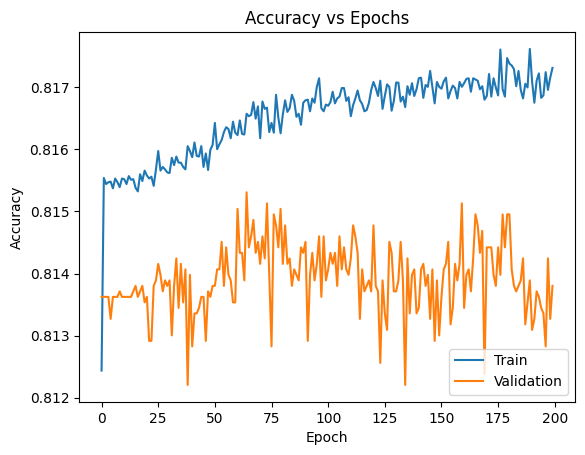

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
#y_perd_tuned_tf = model_3.fit(X_test)
model_3.evaluate(X_test, y_test, verbose = 1)
y_test_pred3 = np.round(model_3.predict(X_test))

1512/1512 [==============================] - 3s 2ms/step


In [ ]:
y_pred_tf_tun3 = tf.argmax(y_test_pred3, axis=1).numpy()

In [ ]:
#Metrics for test data:
print("Metrics report on test data: \n", classification_report(y_test, y_pred_tf_tun3))


Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       0.24      0.00      0.00      5114
           2       0.35      0.01      0.02      3407
           3       0.43      0.01      0.02       389
           4       0.00      0.00      0.00        46

    accuracy                           0.82     48378
   macro avg       0.37      0.20      0.19     48378
weighted avg       0.72      0.82      0.73     48378



In [ ]:
rf_result = pd.Series(y_pred_test_rft).value_counts()
xgb_result = pd.Series(y_pred_prob_xgb).value_counts()
lgbm_result = pd.Series(y_pred_lgbm).value_counts()
tf_tuned = pd.Series(y_pred_tf_tun).value_counts()
tf_tuned3 = pd.Series(y_pred_tf_tun3).value_counts()
df_predicted1 = pd.DataFrame({
    'Predicted_rf': rf_result,
    'Predicted_xgb': xgb_result,
    'Predicted_lgbm': lgbm_result,
    'Predicted_tf': tf_tuned,
    'Predicted_tf_3': tf_tuned3,

})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_rf,Predicted_xgb,Predicted_lgbm,Predicted_tf,Predicted_tf_3
0,39422,48378,47954,48189,48360,48249
1,5114,0,135,12,1,42
2,3407,0,215,115,4,80
3,389,0,64,48,10,7
4,46,0,10,14,3,0


### Cross validation + **HGBM**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier()

clf.fit(X_train, y_train)
scores_clf = cross_val_score(clf, X_train, y_train, cv=5)
scores_clf.mean()

0.813708124761604

In [ ]:
predictions_clf = clf.predict(X_test)

In [ ]:
#Metrics for test data:
print("Metrics report on test data: \n", classification_report(y_test, predictions_clf))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       0.17      0.00      0.00      5114
           2       0.20      0.00      0.01      3407
           3       0.22      0.05      0.09       389
           4       0.03      0.15      0.06        46

    accuracy                           0.81     48378
   macro avg       0.29      0.24      0.21     48378
weighted avg       0.70      0.81      0.73     48378



In [ ]:
rf_result = pd.Series(y_pred_test_rft).value_counts()
xgb_result = pd.Series(y_pred_prob_xgb).value_counts()
lgbm_result = pd.Series(y_pred_lgbm).value_counts()
tf_tuned = pd.Series(y_pred_tf_tun).value_counts()
tf_tuned3 = pd.Series(y_pred_tf_tun3).value_counts()
predictions_clf = pd.Series(predictions_clf).value_counts()
df_predicted1 = pd.DataFrame({
    'Predicted_rf': rf_result,
    'Predicted_xgb': xgb_result,
    'Predicted_lgbm': lgbm_result,
    'Predicted_tf': tf_tuned,
    'Predicted_tf_3': tf_tuned3,
    "Predicted_clf" : predictions_clf

})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_rf,Predicted_xgb,Predicted_lgbm,Predicted_tf,Predicted_tf_3,Predicted_clf
0,39422,48378,47954,48189,48360,48249,48006
1,5114,0,135,12,1,42,18
2,3407,0,215,115,4,80,51
3,389,0,64,48,10,7,95
4,46,0,10,14,3,0,208


### Catboost:

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model_cat = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=6,
                               verbose = 50,
                               early_stopping_rounds=50,
                               auto_class_weights='Balanced')

In [ ]:
model.fit(X_train,y_train,verbose=False)

In [ ]:
predictions_cat = model.predict(X_test)

1512/1512 [==============================] - 3s 2ms/step


In [ ]:
predictions_cat_1 = np.argmax(predictions_cat, axis=1)


In [ ]:
#Metrics for test data:
print("Metrics report on test data: \n", classification_report(y_test, predictions_cat_1))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       0.20      0.00      0.00      5114
           2       0.10      0.00      0.00      3407
           3       0.20      0.04      0.06       389
           4       0.25      0.07      0.10        46

    accuracy                           0.81     48378
   macro avg       0.31      0.22      0.21     48378
weighted avg       0.70      0.81      0.73     48378



In [ ]:
rf_result = pd.Series(y_pred_test_rft).value_counts()
xgb_result = pd.Series(y_pred_prob_xgb).value_counts()
lgbm_result = pd.Series(y_pred_lgbm).value_counts()
tf_tuned = pd.Series(y_pred_tf_tun).value_counts()
tf_tuned3 = pd.Series(y_pred_tf_tun3).value_counts()
predictions_clf = pd.Series(predictions_clf).value_counts()
predic_cat = pd.Series(predictions_cat_1).value_counts()

df_predicted1 = pd.DataFrame({
    'Predicted_rf': rf_result,
    'Predicted_xgb': xgb_result,
    'Predicted_lgbm': lgbm_result,
    'Predicted_tf': tf_tuned,
    'Predicted_tf_3': tf_tuned3,
    "Predicted_clf" : predictions_clf,
    'prediction_cat':predic_cat

})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_rf,Predicted_xgb,Predicted_lgbm,Predicted_tf,Predicted_tf_3,Predicted_clf,prediction_cat
0,39422,48378,47954,48189,48360,48249,0,48219
1,5114,0,135,12,1,42,5,35
2,3407,0,215,115,4,80,0,41
3,389,0,64,48,10,7,0,71
4,46,0,10,14,3,0,0,12


### Cross Validation + GBM

In [ ]:
clf_xgb = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    objective='multi:softprob',
    num_class=5,
    random_state=42
)


cv_scores = cross_val_score(clf_xgb, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
clf_xgb = clf_xgb.fit(X_train, y_train)

In [ ]:
y_pred_clg_xgb = clf_xgb.predict(X_test)

In [ ]:
#Metrics for test data:
print("Metrics report on test data: \n", classification_report(y_test, y_pred_clg_xgb))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       0.25      0.00      0.01      5114
           2       0.33      0.02      0.03      3407
           3       0.31      0.03      0.06       389
           4       0.47      0.17      0.25        46

    accuracy                           0.82     48378
   macro avg       0.43      0.24      0.25     48378
weighted avg       0.72      0.82      0.74     48378



In [ ]:
predic_clg_xgb1 = pd.Series(y_pred_clg_xgb).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_xgb': predic_clg_xgb1,


})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_xgb
0,39422,48056
1,5114,85
2,3407,181
3,389,39
4,46,17


### Adjusting the sample weights for each instance

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {cls: weight for cls, weight in enumerate(class_weights)}


sample_weights = y_train.map(class_weight_dict)


clf_xgb_weighted = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    objective='multi:softprob',
    num_class=5,
    random_state=42
)

clf_xgb_weighted.fit(X_train, y_train, sample_weight=sample_weights)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_clf_xgb_weighted = clf_xgb_weighted.predict(X_test)

In [ ]:
#Metrics for test data:
print("Metrics report on test data: \n", classification_report(y_test, y_pred_clf_xgb_weighted))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.94      0.55      0.69     39422
           1       0.17      0.37      0.23      5114
           2       0.11      0.32      0.17      3407
           3       0.05      0.44      0.09       389
           4       0.04      0.48      0.07        46

    accuracy                           0.51     48378
   macro avg       0.26      0.43      0.25     48378
weighted avg       0.79      0.51      0.60     48378



In [ ]:
predic_clg_xgb1 = pd.Series(y_pred_clf_xgb_weighted ).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_y': predic_clg_xgb1,


})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_y
0,39422,23105
1,5114,11417
2,3407,9692
3,389,3591
4,46,573


### Missclassification technic

In [ ]:
misclassification_costs = {
    0: 1,  # cost for misclassifying class 0
    1: 3,  # cost for misclassifying class 1
    2: 4,  # cost for misclassifying class 2
    3: 5,  # cost for misclassifying class 3
    4: 6   # cost for misclassifying class 4
}

#
sample_weights_cost_sensitive = y_train.map(misclassification_costs)


clf_xgb_cost_sensitive = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    objective='multi:softprob',
    num_class=5,
    random_state=42
)

clf_xgb_cost_sensitive.fit(X_train, y_train, sample_weight=sample_weights_cost_sensitive)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_cost = clf_xgb_cost_sensitive.predict(X_test)

In [ ]:
#Metrics for test data:
print("Metrics report on test data: \n", classification_report(y_test, y_pred_cost))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     39422
           1       0.24      0.08      0.12      5114
           2       0.21      0.18      0.19      3407
           3       0.24      0.08      0.12       389
           4       0.28      0.28      0.28        46

    accuracy                           0.78     48378
   macro avg       0.36      0.31      0.32     48378
weighted avg       0.73      0.78      0.75     48378



In [ ]:
import pickle

# Save the trained model to a file
clf_xgb_cost_sensitive = '/content/drive/MyDrive/KaggleX_Project/clf_xgb_cost_sensitive.pkl'
with open(clf_xgb_cost_sensitive, 'wb') as file:
    pickle.dump(clf_xgb_cost_sensitive, file)

clf_xgb_cost_sensitive

'/content/drive/MyDrive/KaggleX_Project/clf_xgb_cost_sensitive.pkl'

In [ ]:
predic_clg_xgb1 = pd.Series(y_pred_cost).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_y': predic_clg_xgb1,


})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_y
0,39422,43460
1,5114,1828
2,3407,2905
3,389,139
4,46,46


- The result indicate that there has been an improvement in the recall for minority classes (especially Class 4) after implementing cost-sensitive learning.

In [ ]:
cost_ranges = {
    0: [1, 2],
    1: [3, 4, 5],
    2: [4, 5, 6],
    3: [5, 6, 7],
    4: [6, 7, 8]
}

best_score = 0  # Initialize the best score
best_costs = None  # Initialize the best costs

# Iterate over all combinations of misclassification costs
for cost_0 in cost_ranges[0]:
    for cost_1 in cost_ranges[1]:
        for cost_2 in cost_ranges[2]:
            for cost_3 in cost_ranges[3]:
                for cost_4 in cost_ranges[4]:
                    costs = {0: cost_0, 1: cost_1, 2: cost_2, 3: cost_3, 4: cost_4}
                    sample_weights = y_train.map(costs)
                    clf_xgb_cost_sensitive.fit(X_train, y_train, sample_weight=sample_weights)
                    score = clf_xgb_cost_sensitive.score(X_test, y_test)
                    if score > best_score:
                        best_score = score
                        best_costs = costs

print("Best misclassification costs:", best_costs)
print("Best accuracy:", best_score)

Best misclassification costs: {0: 2, 1: 3, 2: 4, 3: 6, 4: 7}
Best accuracy: 0.8126627806027533


In [ ]:
sample_weights_final = y_train.map(best_costs)


clf_xgb_final = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    objective='multi:softprob',
    num_class=5,
    random_state=42
)
clf_xgb_final.fit(X_train, y_train, sample_weight=sample_weights_final)


y_pred_final = clf_xgb_final.predict(X_test)
print("Metrics report on test data: \n", classification_report(y_test, y_pred_final))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90     39422
           1       0.34      0.01      0.02      5114
           2       0.28      0.08      0.12      3407
           3       0.22      0.10      0.13       389
           4       0.29      0.26      0.27        46

    accuracy                           0.81     48378
   macro avg       0.39      0.29      0.29     48378
weighted avg       0.73      0.81      0.75     48378



In [ ]:
import pickle

# Save the trained model to a file
clf_xgb_final = '/content/drive/MyDrive/KaggleX_Project/clf_xgb_final.pkl'
with open(clf_xgb_final, 'wb') as file:
    pickle.dump(clf_xgb_final, file)

clf_xgb_final

'/content/drive/MyDrive/KaggleX_Project/clf_xgb_final.pkl'

In [ ]:
predic_clg_xgb1 = pd.Series(y_pred_cost).value_counts()
predict_tuned = pd.Series(y_pred_final).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_y': predic_clg_xgb1,
    "Predicted_y_tuned": predict_tuned


})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_y,Predicted_y_tuned
0,39422,43460,47098
1,5114,1828,125
2,3407,2905,939
3,389,139,174
4,46,46,42


### Observation:
1. **'NO APPARENT INJURY' (Class 0)**:
    - The original model predicted more than the actual count. This is common in imbalanced datasets where the model tends to predict the majority class more frequently.
    - The tuned model further increased predictions for this class.

2. **'POSSIBLE INJURY' (Class 1)**:
    - The original model significantly under-predicted this class.
    - The tuned model even more drastically under-predicted it.

3. **'SUSPECTED MINOR INJURY' (Class 2)**:
    - The original model was reasonably close to the actual count.
    - The tuned model under-predicted this class by a larger margin.

4. **'SUSPECTED SERIOUS INJURY' (Class 3)**:
    - The original model under-predicted this class.
    - The tuned model improved predictions for this class.

5. **'FATAL INJURY' (Class 4)**:
    - Both models were close to the actual count, with the tuned model slightly under-predicting.

**Interpretation**:
- The tuning appears to have made the model even more biased towards predicting the majority class (`NO APPARENT INJURY`).
- However, it improved predictions for `SUSPECTED SERIOUS INJURY`.
- There's a significant decline in predictions for `POSSIBLE INJURY` and `SUSPECTED MINOR INJURY` with the tuned model.
  
**Recommendations**:
1. **Rethink Misclassification Costs**: The decline in predictions for Classes 1 and 2 suggests that the misclassification costs might need to be adjusted. The cost for misclassifying the majority class might be too low or the costs for Classes 1 and 2 too high.
2. **Model Complexity**: Consider increasing the model complexity by adjusting hyperparameters like `max_depth` or `n_estimators`.
3. **Data Quality**: Ensure the data is correctly labeled and preprocessed.
4. **Ensemble**: Combine the predictions of multiple models to improve generalization.
5. **External Validation**: If possible, test the model on an entirely different dataset to gauge its real-world performance.
6. **Feedback Loop**: In real-world applications, continuously collecting feedback and retraining models can lead to improvements over time.


In [ ]:
# 0: 2, 1: 3, 2: 4, 3: 6, 4: 7
# 0: 2,  # cost for misclassifying class 0
 #   1: 3,  # cost for misclassifying class 1
 #   2: 4,  # cost for misclassifying class 2
 #   3: 5,  # cost for misclassifying class 3
 #   4: 6

misclassification_costs = {
    0: 0.78,  # cost for misclassifying class 0
    1: 3,  # cost for misclassifying class 1
    2: 3.5,  # cost for misclassifying class 2
    3: 5,  # cost for misclassifying class 3
    4: 6   # cost for misclassifying class 4
}

#
sample_weights_cost_sensitive_m2 = y_train.map(misclassification_costs)


clf_xgb_cost_sensitive_m2 = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    objective='multi: softprob',
    num_class=5,
    random_state=42
)

clf_xgb_cost_sensitive_m2.fit(X_train, y_train, sample_weight=sample_weights_cost_sensitive_m2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_cost_m2 = clf_xgb_cost_sensitive_m2.predict(X_test)

In [ ]:
#Metrics for test data:
print("Metrics report on test data: \n", classification_report(y_test, y_pred_cost_m2))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87     39422
           1       0.22      0.23      0.22      5114
           2       0.21      0.15      0.17      3407
           3       0.22      0.11      0.14       389
           4       0.30      0.30      0.30        46

    accuracy                           0.75     48378
   macro avg       0.36      0.33      0.34     48378
weighted avg       0.74      0.75      0.75     48378



In [ ]:
predic_clg_xgb1 = pd.Series(y_pred_cost).value_counts()
predict_tuned = pd.Series(y_pred_final).value_counts()
predict_m2 = pd.Series(y_pred_cost_m2).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_y': predic_clg_xgb1,
    "Predicted_y_tuned": predict_tuned,
    "Predicted_y_m2" : predict_m2


})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_y,Predicted_y_tuned,Predicted_y_m2
0,39422,43460,47098,40305
1,5114,1828,125,5412
2,3407,2905,939,2419
3,389,139,174,195
4,46,46,42,47


### Saving models:

In [ ]:
import pickle

# Save the trained model to a file
clf_xgb_cost_sensitive_m2 = '/content/drive/MyDrive/KaggleX_Project/clf_xgb_cost_sensitive_m2.pkl'
with open(clf_xgb_cost_sensitive_m2, 'wb') as file:
    pickle.dump(clf_xgb_cost_sensitive_m2, file)

clf_xgb_cost_sensitive_m2

'/content/drive/MyDrive/KaggleX_Project/clf_xgb_cost_sensitive_m2.pkl'

### CAT boost Classifier

In [41]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [60]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
clf_cat = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=200, task_type="CPU")

# Train model
clf_cat.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred_cat = clf_cat.predict(X_test)

print(classification_report(y_test, y_pred_cat))


0:	learn: 1.3758317	total: 68.8ms	remaining: 34.3s
200:	learn: 0.5403857	total: 16.4s	remaining: 24.4s
400:	learn: 0.5289888	total: 32.4s	remaining: 7.99s
499:	learn: 0.5244105	total: 41s	remaining: 0us
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     39422
           1       0.28      0.01      0.02      5114
           2       0.33      0.03      0.05      3407
           3       0.34      0.06      0.11       389
           4       0.71      0.11      0.19        46

    accuracy                           0.82     48378
   macro avg       0.50      0.24      0.25     48378
weighted avg       0.72      0.82      0.74     48378



In [44]:
# Predict on training set
y_train_pred = clf_cat.predict(X_train)

# Evaluate on training set
print("Metrics report on train data: \n", classification_report(y_train, y_train_pred))


Metrics report on train data: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     92037
           1       0.64      0.03      0.05     11704
           2       0.59      0.05      0.09      8064
           3       0.64      0.16      0.25       973
           4       0.93      0.53      0.67       104

    accuracy                           0.82    112882
   macro avg       0.72      0.35      0.40    112882
weighted avg       0.79      0.82      0.75    112882



### SMOTE

In [27]:
pip install imbalanced-learn

In [2]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

NameError: ignored

In [47]:
clf_cat_smote = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=200, task_type="CPU")
clf_cat_smote.fit(X_train_smote, y_train_smote)

0:	learn: 1.5040752	total: 517ms	remaining: 4m 17s
200:	learn: 0.7101158	total: 1m 14s	remaining: 1m 50s
400:	learn: 0.6137090	total: 2m 26s	remaining: 36.1s
499:	learn: 0.5865033	total: 3m 1s	remaining: 0us


In [49]:
# Predict on training set
y_train_pred_smote = clf_cat_smote.predict(X_train_smote)

# Evaluate on training set
print("Metrics report on train data: \n", classification_report(y_train_smote, y_train_pred_smote))

Metrics report on train data: 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83     92037
           1       0.60      0.50      0.55     92037
           2       0.61      0.52      0.56     92037
           3       0.81      0.90      0.85     92037
           4       0.98      1.00      0.99     92037

    accuracy                           0.77    460185
   macro avg       0.75      0.77      0.76    460185
weighted avg       0.75      0.77      0.76    460185



In [50]:
y_pred_smote = clf_cat_smote.predict(X_test)
print("Metrics report on test data: \n", classification_report(y_test, y_pred_smote))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87     39422
           1       0.20      0.15      0.17      5114
           2       0.18      0.11      0.14      3407
           3       0.11      0.18      0.14       389
           4       0.13      0.26      0.17        46

    accuracy                           0.76     48378
   macro avg       0.29      0.32      0.30     48378
weighted avg       0.73      0.76      0.74     48378



In [65]:
print(y_pred_cat.shape)
print(y_pred_smote.shape)
print(y_test.shape)

(48378, 1)
(48378, 1)
(48378,)


In [66]:
y_pred_cat = y_pred_cat.ravel()
y_pred_smote = y_pred_smote.ravel()

In [67]:
predict_1 = pd.Series(y_pred_cat).value_counts()
predict_2= pd.Series(y_pred_smote).value_counts()
#predict_3 = pd.Series(y_pred_cost_m2).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_cat': predict_1 ,
    "Predicted_cat-smote": predict_2



})

df_actual = pd.Series(y_test).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_cat,Predicted_cat-smote
0,39422,47819,41782
1,5114,199,3772
2,3407,279,2098
3,389,74,631
4,46,7,95


In [7]:
df1 = pd.read_csv('/content/drive/MyDrive/KaggleX_Project/Data/car_accident_preprecced_df.csv')

In [8]:
df1.shape

(161260, 41)

Let's add column **"Road Name"** to data.

In [9]:
drop_columns = ['Report Number', 'Cross-Street Name', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Route Type', 'Cross-Street Type', 'Person ID', 'Drivers License State', 'Vehicle ID', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Continuing Dir', 'Vehicle Going Dir','Driverless Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Location', 'Weekday?', 'Crash Time', 'Crash Date', 'Year', 'Latitude', 'Longitude']

In [10]:
df1.drop(columns=drop_columns, inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Road Name                161260 non-null  object
 1   Collision Type           161260 non-null  object
 2   Weather                  161260 non-null  object
 3   Surface Condition        161260 non-null  object
 4   Light                    161260 non-null  object
 5   Traffic Control          161260 non-null  object
 6   Driver Substance Abuse   161260 non-null  object
 7   Driver At Fault          161260 non-null  object
 8   Injury Severity          161260 non-null  object
 9   Vehicle Damage Extent    161260 non-null  object
 10  Vehicle Body Type        161260 non-null  object
 11  Vehicle Movement         161260 non-null  object
 12  Speed Limit              161260 non-null  int64 
 13  Parked Vehicle           161260 non-null  object
 14  Equipment Problems  

In [12]:
df1.to_csv("/content/drive/MyDrive/KaggleX_Project/Data/df_1_for_ml.csv", index=False)

2. Encoding Categorical Variables

In [13]:
category_columns = ['Road Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light',
                   'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Vehicle Damage Extent', 'Vehicle Body Type',
                   'Vehicle Movement', 'Parked Vehicle', 'Equipment Problems',
                    'Driver Distracted Group']

numerical_columns = ['Speed Limit']

In [14]:
label_encoder = LabelEncoder()
for column in category_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [16]:
import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [26]:
top_10_roads = df1['Weather'].value_counts()
top_10_roads.head(10)

2     109224
6      19368
3      16298
10     13141
9       1403
4        620
11       375
5        347
8        210
7        147
Name: Weather, dtype: int64

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161260 entries, 0 to 161259
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Road Name                161260 non-null  int64 
 1   Collision Type           161260 non-null  int64 
 2   Weather                  161260 non-null  int64 
 3   Surface Condition        161260 non-null  int64 
 4   Light                    161260 non-null  int64 
 5   Traffic Control          161260 non-null  int64 
 6   Driver Substance Abuse   161260 non-null  int64 
 7   Driver At Fault          161260 non-null  int64 
 8   Injury Severity          161260 non-null  object
 9   Vehicle Damage Extent    161260 non-null  int64 
 10  Vehicle Body Type        161260 non-null  int64 
 11  Vehicle Movement         161260 non-null  int64 
 12  Speed Limit              161260 non-null  int64 
 13  Parked Vehicle           161260 non-null  int64 
 14  Equipment Problems  

In [77]:
target_column = df1['Injury Severity'].value_counts()
target_column

NO APPARENT INJURY          131459
POSSIBLE INJURY              16818
SUSPECTED MINOR INJURY       11471
SUSPECTED SERIOUS INJURY      1362
FATAL INJURY                   150
Name: Injury Severity, dtype: int64

In [27]:
severity_mapping = {
    'NO APPARENT INJURY': 0,
    'POSSIBLE INJURY': 1,
    'SUSPECTED MINOR INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4
}

In [28]:
df1['Injury Severity'] = df1['Injury Severity'].map(severity_mapping)

In [29]:
df1['Injury Severity'].value_counts()

0    131459
1     16818
2     11471
3      1362
4       150
Name: Injury Severity, dtype: int64

#### 3. Feature Scaling

In [30]:
X = df1.drop('Injury Severity', axis=1)
y = df1['Injury Severity']

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [86]:
X[10][4]

0.5237267297235009

In [92]:
from sklearn.preprocessing import StandardScaler
import pickle

with open("standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [83]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
y_test_1.value_counts()

0    39422
1     5114
2     3407
3      389
4       46
Name: Injury Severity, dtype: int64

### Modeling

### SMOTE

In [ ]:
pip install catboost

In [26]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00


In [30]:
from catboost import CatBoostClassifier

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train_1, y_train_1)

In [39]:
clf_cat_smote = CatBoostClassifier(iterations=500, depth=11, learning_rate=0.1, verbose=200, task_type="CPU")
clf_cat_smote.fit(X_train_smote, y_train_smote)

0:	learn: 1.4787171	total: 1.11s	remaining: 9m 14s
200:	learn: 0.4599039	total: 3m 35s	remaining: 5m 20s
400:	learn: 0.3421281	total: 7m 9s	remaining: 1m 46s
499:	learn: 0.3050661	total: 8m 57s	remaining: 0us


In [40]:
# Predict on training set
y_train_pred_smote = clf_cat_smote.predict(X_train_smote)

# Evaluate on training set
print("Metrics report on train data: \n", classification_report(y_train_smote, y_train_pred_smote))

Metrics report on train data: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.90     92037
           1       0.87      0.78      0.82     92037
           2       0.88      0.82      0.85     92037
           3       0.95      0.99      0.97     92037
           4       1.00      1.00      1.00     92037

    accuracy                           0.91    460185
   macro avg       0.91      0.91      0.91    460185
weighted avg       0.91      0.91      0.91    460185



In [41]:
y_pred_smote = clf_cat_smote.predict(X_test_1)
print("Metrics report on test data: \n", classification_report(y_test_1, y_pred_smote))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.88     39422
           1       0.21      0.10      0.14      5114
           2       0.19      0.09      0.12      3407
           3       0.09      0.07      0.08       389
           4       0.24      0.20      0.22        46

    accuracy                           0.78     48378
   macro avg       0.32      0.28      0.29     48378
weighted avg       0.72      0.78      0.74     48378



In [91]:
X_test_1

array([[-0.40113   , -0.3552561 ,  1.07137003, ..., -0.12673057,
        -0.62058547,  0.9032229 ],
       [-0.98891987, -0.83023473,  1.07137003, ..., -0.12673057,
         1.59931135,  0.9032229 ],
       [ 0.44886027, -0.83023473, -0.54023721, ..., -0.12673057,
         1.59931135,  0.9032229 ],
       ...,
       [-0.87174607,  1.30716912, -0.54023721, ..., -0.12673057,
        -0.62058547,  0.23874423],
       [-0.6028226 ,  0.83219049,  2.28007546, ..., -0.12673057,
        -0.62058547,  0.23874423],
       [ 0.20490826, -1.54270268, -0.54023721, ..., -0.12673057,
        -0.62058547,  0.23874423]])

In [88]:
import pickle

# Save the trained model to a file
clf_cat_smote = '/content/drive/MyDrive/KaggleX_Project/smoke_cat_1.pkl'
with open(clf_cat_smote, 'wb') as file:
    pickle.dump(clf_cat_smote, file)

clf_cat_smote

'/content/drive/MyDrive/KaggleX_Project/smoke_cat_1.pkl'

In [90]:
with open('smoke_cat_1.pkl', 'wb') as file:
    pickle.dump(clf_cat_smote, file)

**Observations:**

- The model has a high accuracy on the training set (91%).

- On the test data, the model's accuracy is lower (78%). The performance on the minority classes, especially class 3 and 4, is still not optimal, which suggests the model might need further tuning or that the features might not be discriminative enough for these classes.

### **Tuning SMOTE**

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, make_scorer
from imblearn.over_sampling import SMOTE


param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'depth': [7, 9, 11],
    'iterations': [50, 100, 200]
}

clf_cat = CatBoostClassifier(task_type="CPU", verbose=0)

f1_scorer = make_scorer(f1_score, average='macro')

random_search = RandomizedSearchCV(clf_cat, param_distributions=param_grid, n_iter=5, scoring=f1_scorer, n_jobs=-1, cv=3, verbose=10)

random_search.fit(X_train_smote, y_train_smote)

best_params = random_search.best_params_

print("Best parameters found: ", best_params)

clf_cat_best = CatBoostClassifier(**best_params, task_type="CPU", verbose=200)
clf_cat_best.fit(X_train_smote, y_train_smote)

y_pred_best = clf_cat_best.predict(X_test_1)
print("Metrics report on test data with best parameters: \n", classification_report(y_test_1, y_pred_best))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters found:  {'learning_rate': 0.05, 'iterations': 200, 'depth': 9}
0:	learn: 1.5473438	total: 569ms	remaining: 1m 53s
199:	learn: 0.6734423	total: 2m 6s	remaining: 0us
Metrics report on test data with best parameters: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87     39422
           1       0.20      0.15      0.17      5114
           2       0.17      0.11      0.13      3407
           3       0.08      0.26      0.12       389
           4       0.08      0.50      0.13        46

    accuracy                           0.75     48378
   macro avg       0.28      0.38      0.29     48378
weighted avg       0.73      0.75      0.74     48378



### XGB + Misclassification Cost Technique

In [28]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [37]:
misclassification_costs = {
    0: 2,  # cost for misclassifying class 0 1 2n  2
    1: 4,  # cost for misclassifying class 1 3 4  5
    2: 6,  # cost for misclassifying class 2 4 6  6
    3: 8,  # cost for misclassifying class 3 5 8  7
    4: 10   # cost for misclassifying class 4 6 10  9
}

#
sample_weights_cost_sensitive = y_train_1.map(misclassification_costs)


clf_xgb_cost_sensitive = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    objective='multi:softprob',
    num_class=5,
    random_state=42
)

clf_xgb_cost_sensitive.fit(X_train_1, y_train_1, sample_weight=sample_weights_cost_sensitive)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [38]:
# Predict on training set
y_train_pred = clf_xgb_cost_sensitive.predict(X_train_1)

# Evaluate on training set
print("Metrics report on train data: \n", classification_report(y_train_1, y_train_pred))

Metrics report on train data: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90     92037
           1       0.49      0.01      0.02     11704
           2       0.29      0.16      0.21      8064
           3       0.50      0.21      0.29       973
           4       0.63      0.70      0.67       104

    accuracy                           0.81    112882
   macro avg       0.55      0.41      0.42    112882
weighted avg       0.76      0.81      0.76    112882



In [39]:
y_pred = clf_xgb_cost_sensitive.predict(X_test_1)
print("Metrics report on test data: \n", classification_report(y_test_1, y_pred))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90     39422
           1       0.30      0.01      0.01      5114
           2       0.23      0.13      0.17      3407
           3       0.23      0.09      0.13       389
           4       0.28      0.28      0.28        46

    accuracy                           0.80     48378
   macro avg       0.37      0.30      0.30     48378
weighted avg       0.73      0.80      0.75     48378



In [40]:
predict_1 = pd.Series(y_pred).value_counts()
#redict_2= pd.Series(y_pred_smote).value_counts()
#predict_3 = pd.Series(y_pred_cost_m2).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_1': predict_1 ,




})

df_actual = pd.Series(y_test_1).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_1
0,39422,46074
1,5114,104
2,3407,2000
3,389,153
4,46,47


#### Best misclassification costs:

In [38]:
cost_ranges = {
    0: [1, 2],
    1: [2, 3, 4],
    2: [3, 4, 5, 6],
    3: [4, 5, 6, 7, 8],
    4: [5, 6, 7, 8, 9, 10]
}

best_score = 0  # Initialize the best score
best_costs = None  # Initialize the best costs

# Iterate over all combinations of misclassification costs
for cost_0 in cost_ranges[0]:
    for cost_1 in cost_ranges[1]:
        for cost_2 in cost_ranges[2]:
            for cost_3 in cost_ranges[3]:
                for cost_4 in cost_ranges[4]:
                    costs = {0: cost_0, 1: cost_1, 2: cost_2, 3: cost_3, 4: cost_4}
                    sample_weights = y_train_1.map(costs)
                    clf_xgb_cost_sensitive.fit(X_train_1, y_train_1, sample_weight=sample_weights)
                    score = clf_xgb_cost_sensitive.score(X_test_1, y_test_1)
                    if score > best_score:
                        best_score = score
                        best_costs = costs

print("Best misclassification costs:", best_costs)
print("Best accuracy:", best_score)

Best misclassification costs: {0: 2, 1: 2, 2: 3, 3: 4, 4: 7}
Best accuracy: 0.8146264831121585


Best misclassification costs: {0: 2, 1: 2, 2: 3, 3: 4, 4: 7}
Best accuracy: 0.8146264831121585

misclassification_costs = {
    0: 2,  # cost for misclassifying class 0
    1: 3,  # cost for misclassifying class 1
    2: 4,  # cost for misclassifying class 2
    3: 5,  # cost for misclassifying class 3
    4: 8   # cost for misclassifying class 4
}


In [41]:
misclassification_costs = {
    0: 2,  # cost for misclassifying class 0
    1: 3,  # cost for misclassifying class 1
    2: 4,  # cost for misclassifying class 2
    3: 5,  # cost for misclassifying class 3
    4: 8   # cost for misclassifying class 4
}

#
sample_weights_cost_sensitive = y_train_1.map(misclassification_costs)


clf_xgb_cost_sensitive = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=10,
    objective='multi:softprob',
    num_class=5,
    random_state=42
)

clf_xgb_cost_sensitive.fit(X_train_1, y_train_1, sample_weight=sample_weights_cost_sensitive)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [42]:
y_pred_score  = clf_xgb_cost_sensitive.predict(X_test_1)
print("Metrics report on test data: \n", classification_report(y_test_1, y_pred_score))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     39422
           1       0.22      0.02      0.04      5114
           2       0.25      0.07      0.11      3407
           3       0.22      0.08      0.11       389
           4       0.27      0.15      0.19        46

    accuracy                           0.81     48378
   macro avg       0.36      0.26      0.27     48378
weighted avg       0.72      0.81      0.75     48378



In [43]:
predict_1 = pd.Series(y_pred).value_counts()
predict_2= pd.Series(y_pred_score).value_counts()
#predict_3 = pd.Series(y_pred_cost_m2).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_1': predict_1 ,
    'Predicted_score': predict_2 ,




})

df_actual = pd.Series(y_test_1).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_1,Predicted_score
0,39422,46074,46725
1,5114,104,499
2,3407,2000,993
3,389,153,135
4,46,47,26


#### Boosting Parameters:

Best misclassification costs: {0: 2, 1: 2, 2: 3, 3: 4, 4: 7} Best accuracy: 0.8146264831121585

In [30]:
misclassification_costs = {
    0: 2,  # cost for misclassifying class 0=2, 2,2,1
    1: 8,  # cost for misclassifying class 1=7,7,7,4
    2: 10,  # cost for misclassifying class 2=8,10,6,6
    3: 18,  # cost for misclassifying class 3=10,11,8,8
    4: 19  # cost for misclassifying class 4=14,15,15,15
}

#
sample_weights_cost_sensitive = y_train_1.map(misclassification_costs)


clf_xgb_cost_sensitive_boost = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=10,
    objective='multi:softprob',
    num_class=5,
    scale_pos_weight=50,  # adjust based on data 1) 1; 2)5
    random_state=42
)

clf_xgb_cost_sensitive_boost.fit(X_train_1, y_train_1, sample_weight=sample_weights_cost_sensitive)

y_pred_score_b  = clf_xgb_cost_sensitive_boost.predict(X_test_1)
print("Metrics report on test data: \n", classification_report(y_test_1, y_pred_score_b))

Metrics report on test data: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86     39422
           1       0.21      0.24      0.23      5114
           2       0.19      0.20      0.19      3407
           3       0.16      0.11      0.13       389
           4       0.28      0.20      0.23        46

    accuracy                           0.74     48378
   macro avg       0.34      0.32      0.33     48378
weighted avg       0.74      0.74      0.74     48378



In [44]:
predict_1 = pd.Series(y_pred).value_counts()
predict_2= pd.Series(y_pred_score).value_counts()
predict_3 = pd.Series(y_pred_score_b).value_counts()

df_predicted1 = pd.DataFrame({

    'Predicted_1': predict_1 ,
    'Predicted_score': predict_2 ,
    'Predicted_boost': predict_3 ,




})

df_actual = pd.Series(y_test_1).value_counts()
df_actual1 = pd.DataFrame({'Actual': df_actual})

comparison_df_tuned = df_actual1.join(df_predicted1, how='outer').fillna(0).astype(int)

comparison_df_tuned

,Actual,Predicted_1,Predicted_score,Predicted_boost
0,39422,46074,46725,38904
1,5114,104,499,5674
2,3407,2000,993,3508
3,389,153,135,260
4,46,47,26,32


### Support Vector Machinen SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Data preprocessing: Scaling features
scaler = StandardScaler().fit(X_train_1)
X_train_scaled = scaler.transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

# Training SVM
clf_svm = SVC(kernel='linear', class_weight='balanced', C=1.0)
clf_svm.fit(X_train_scaled, y_train_1)

# Predicting
y_pred = clf_svm.predict(X_test_scaled)

# Metrics
print("Metrics report on test data: \n", classification_report(y_test_1, y_pred))

Smote,random sampling method

max_depth = 10,11,etc and criterion = ‘gini’ Criterion = ‘entropy’